
####   
#### <center>  Target of this notebook


- Explore and understand of the dataset -> EDA Section
- Predict Customer Churn -> Modelling Section
- Compare between different ML Models using Lift Chart -> Lift Chart Section

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks


Using TensorFlow backend.


In [5]:
import sys
sys.path.append('..')

from src.visualization import plot_bar_chart, plot_dist, plot_boxplot, plot_multi_boxplot,\
histogram_and_density,box_plot_numeric, plot_Lift_curve

from src.utils import label, print_stats

# Task 1:  EDA - Exploratory Data Analysis

In [6]:
#Import dataset
train = pd.read_csv('../dataset/train.csv')
test= pd.read_csv('../dataset/test.csv')

In [7]:
train.head(1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,no


In [8]:
test.head(1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no


In [9]:
#Print out attributes in the dataset
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [10]:
#Map churn to numeric label (1: churn, 0: not churn)
train['label'] = train['churn'].map(label)
test['label'] = test['churn'].map(label)

In [11]:
#Check missing values and value types on train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [12]:
#Check value range
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,label
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [13]:
#Check missing values and value types on test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1667 non-null   object 
 1   account_length                 1667 non-null   int64  
 2   area_code                      1667 non-null   object 
 3   international_plan             1667 non-null   object 
 4   voice_mail_plan                1667 non-null   object 
 5   number_vmail_messages          1667 non-null   int64  
 6   total_day_minutes              1667 non-null   float64
 7   total_day_calls                1667 non-null   int64  
 8   total_day_charge               1667 non-null   float64
 9   total_eve_minutes              1667 non-null   float64
 10  total_eve_calls                1667 non-null   int64  
 11  total_eve_charge               1667 non-null   float64
 12  total_night_minutes            1667 non-null   f

## EDA: Category Variables

## Geography affects churn rate?

### Observe relationship between churn and state

In [14]:
churn_by_state = train.groupby(['state', 'churn']).size().unstack(fill_value=0).reset_index().sort_values(by = 'no', ascending = False)
churn_by_state['churn_percentage'] = churn_by_state['yes'].div(churn_by_state.sum(axis=1))*100
churn_by_state.sort_values(by="no", ascending = False, inplace = True)
churn_by_state.head(1)

churn,state,no,yes,churn_percentage
49,WV,96,10,9.433962


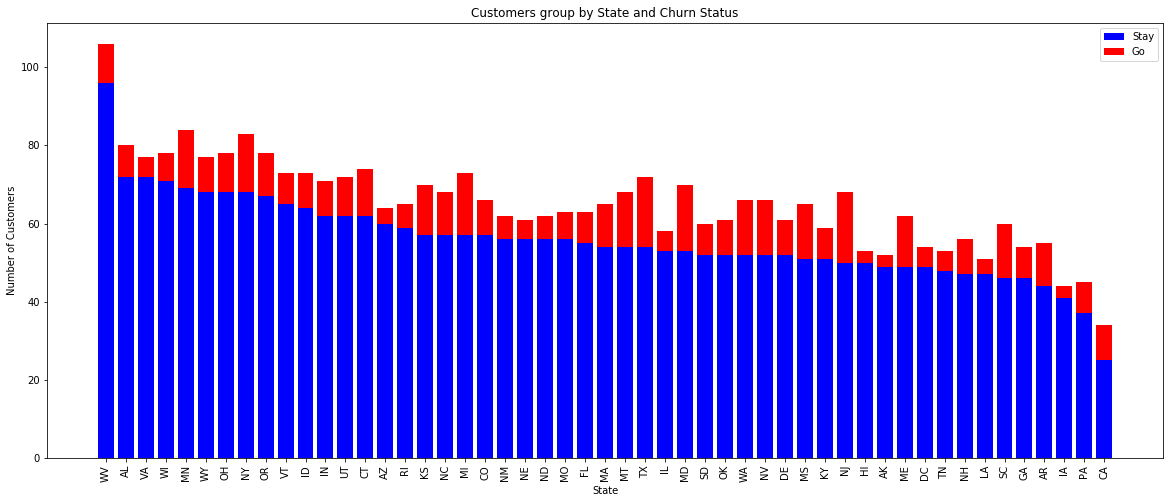

In [15]:
x= churn_by_state.state
y1= churn_by_state.no
y2= churn_by_state.yes


plt.figure(figsize=(20,8))
plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.xlabel("State")
plt.xticks(rotation='vertical')
plt.ylabel("Number of Customers")
plt.legend(['Stay',  'Go'])
plt.title("Customers group by State and Churn Status")
plt.show()

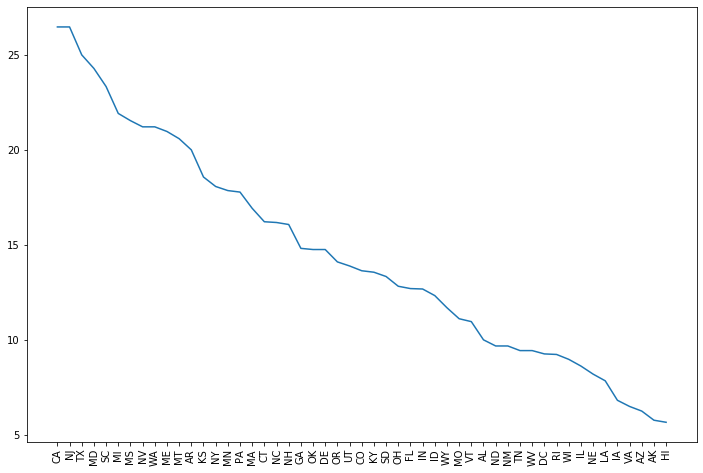

In [16]:
plt.figure(figsize=(12,8))
churn_by_state.sort_values(by = 'churn_percentage', ascending = False, inplace= True)
plt.xticks(rotation='90')
plt.plot(churn_by_state.state, churn_by_state.churn_percentage)
plt.show()# Plot the chart


In [17]:
churn_by_area_code = train.groupby(['area_code', 'churn']).size().unstack(fill_value=0).reset_index().sort_values(by = 'no', ascending = False)
churn_by_area_code['churn_percentage'] = churn_by_area_code['no'].div(churn_by_area_code.sum(axis=1))*100
churn_by_area_code.sort_values(by="churn_percentage", ascending = False, inplace = True)
churn_by_area_code.head(1)

churn,area_code,no,yes,churn_percentage
1,area_code_415,1419,236,85.740181


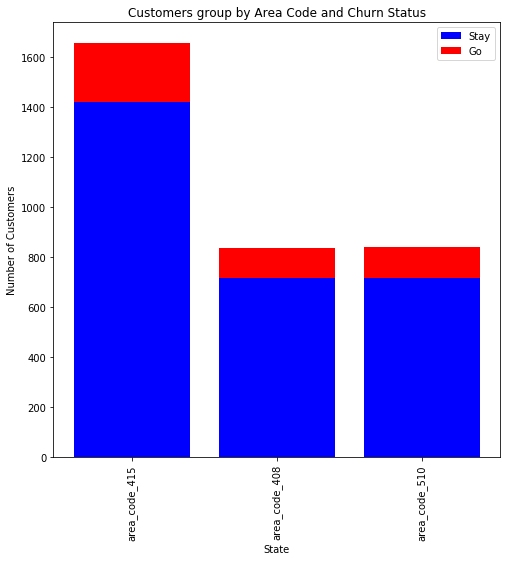

In [18]:
x= churn_by_area_code.area_code
y1= churn_by_area_code.no
y2= churn_by_area_code.yes
y3= churn_by_area_code.churn_percentage


plt.figure(figsize=(8,8))
plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')
plt.xlabel("State")
plt.xticks(rotation='vertical')
plt.ylabel("Number of Customers")
plt.legend(['Stay',  'Go'])
plt.title("Customers group by Area Code and Churn Status")
plt.show()

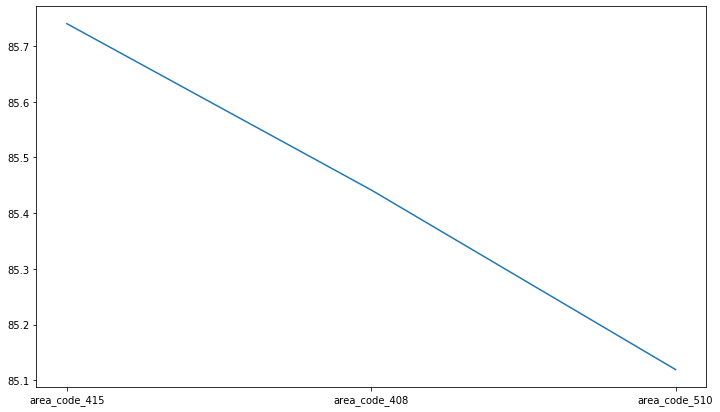

In [19]:
plt.figure(figsize=(12,7))
plt.plot(churn_by_area_code.area_code, churn_by_area_code.churn_percentage)
plt.show()# Plot the chart

### Customers who make international phone call 

In [20]:
(train
 .groupby(['international_plan','churn'])
 .size().unstack(fill_value=0)
 .reset_index()
.assign(churn_percentage = lambda df: df['no'].div(df.sum(axis=1))))

churn,international_plan,no,yes,churn_percentage
0,no,2664,346,0.885050
1,yes,186,137,0.575851


### Customers who leave voice mails

In [21]:
(train
 .groupby(['voice_mail_plan','churn'])
 .size().unstack(fill_value=0)
 .reset_index()
.assign(churn_percentage = lambda df: df['no'].div(df.sum(axis=1))))

churn,voice_mail_plan,no,yes,churn_percentage
0,no,2008,403,0.832849
1,yes,842,80,0.913232


## Numerical Variables

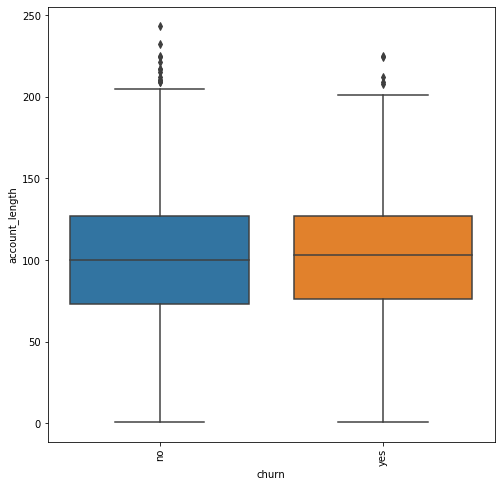

In [22]:
# Account length
plot_multi_boxplot('churn','account_length', train)

<Figure size 1000x800 with 0 Axes>

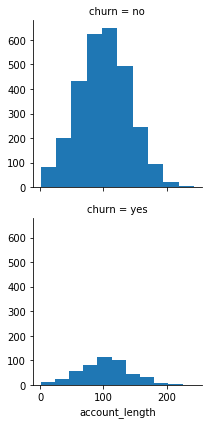

In [23]:
plt.figure(figsize=(10, 8), dpi=100)
g = sns.FacetGrid(train, row = "churn")
g = g.map(plt.hist, "account_length")
plt.show()

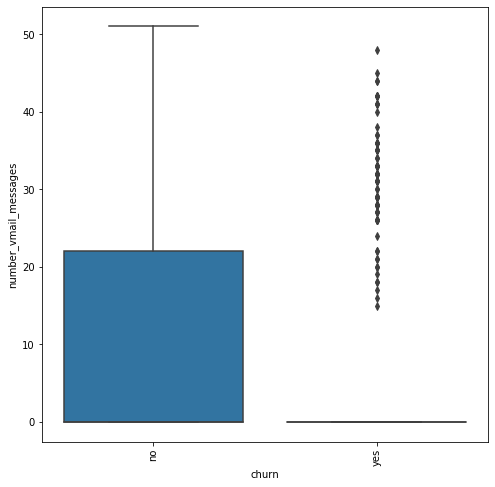

In [24]:
# number_vmail_messages
plot_multi_boxplot('churn','number_vmail_messages', train)

### Total number of calls classify by day time: total_day_calls/total_night_calls/total_night_calls

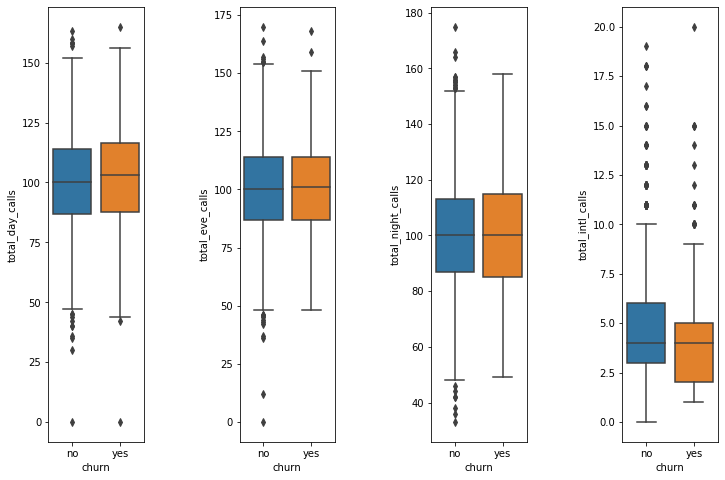

In [25]:
box_plot_numeric(df = train, columns = ['total_day_calls','total_eve_calls','total_night_calls', 'total_intl_calls'], target = 'churn')


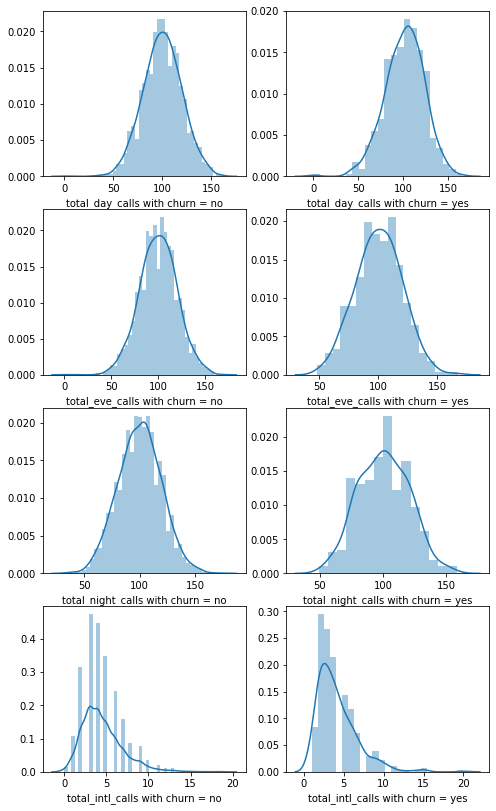

In [26]:
histogram_and_density(df = train, columns = ['total_day_calls','total_eve_calls','total_night_calls', 'total_intl_calls'], target = 'churn')

### Charge Fees break down by time: total_day_charge/total_eve_charge/total_intl_charge

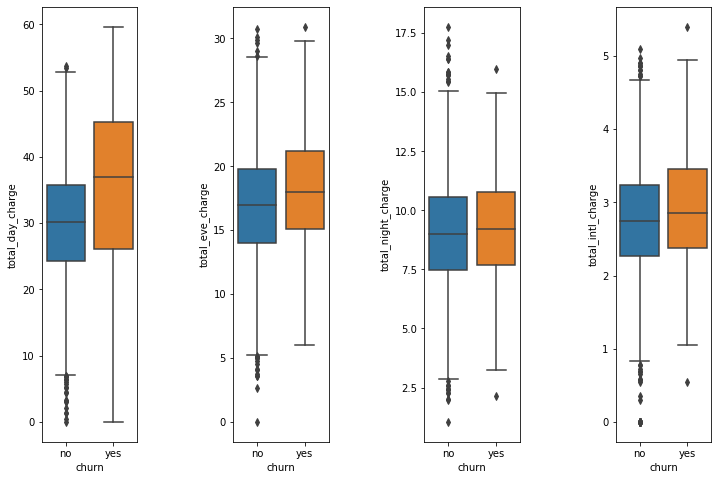

In [27]:
box_plot_numeric(df = train, columns = ['total_day_charge','total_eve_charge','total_night_charge', 'total_intl_charge'], target = 'churn')

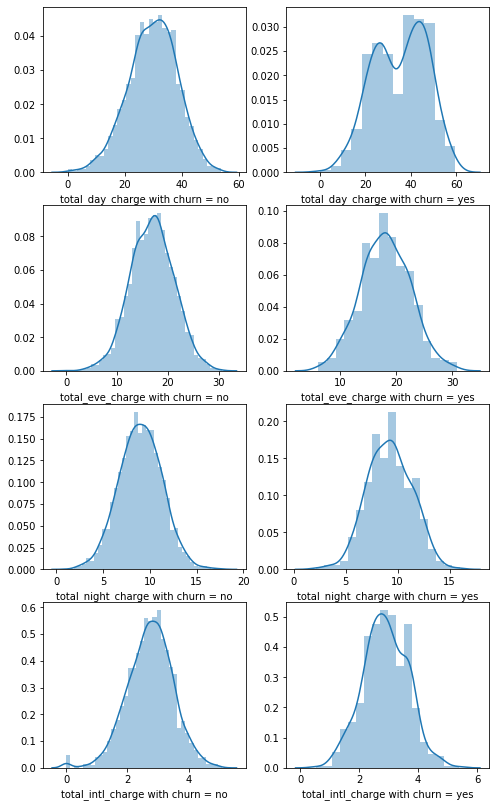

In [28]:
histogram_and_density(df = train, columns = ['total_day_charge','total_eve_charge','total_night_charge', 'total_intl_charge'], target = 'churn')

### Call in Muinutes break down by time: total_day_minutes/total_eve_minutes/total_intl_minutes

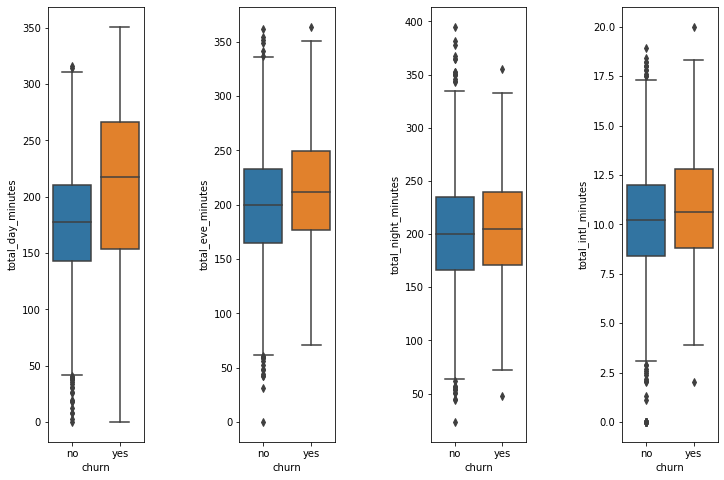

In [29]:
box_plot_numeric(df = train, columns = ['total_day_minutes','total_eve_minutes','total_night_minutes', 'total_intl_minutes'], target = 'churn')

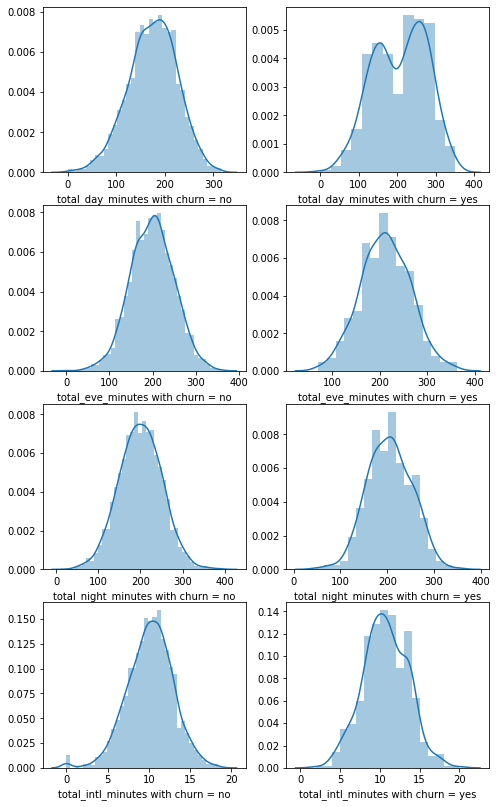

In [30]:
histogram_and_density(df = train, columns = ['total_day_minutes','total_eve_minutes','total_night_minutes', 'total_intl_minutes'], target = 'churn')

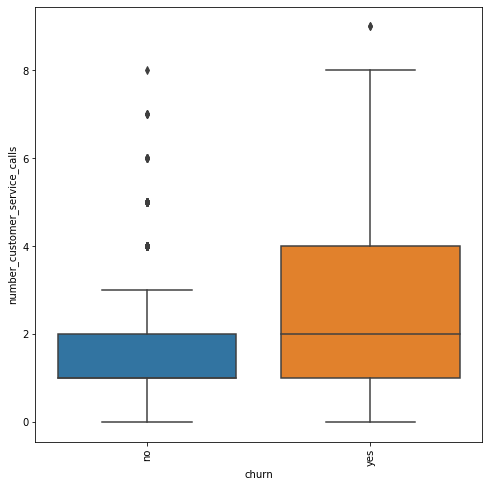

In [31]:
observation = 'number_customer_service_calls'
plot_multi_boxplot('churn',observation, train)

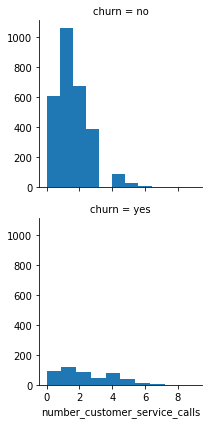

In [32]:
g = sns.FacetGrid(train, row = 'churn')
g = g.map(plt.hist, observation)
plt.show()

### Correlation chart

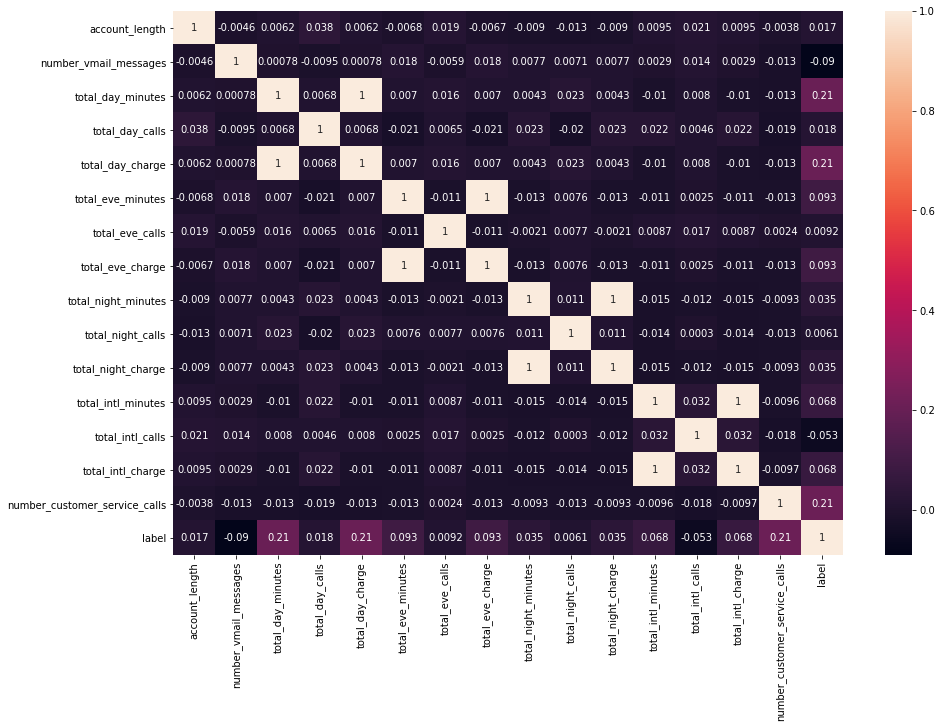

In [33]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train.select_dtypes(include=numerics)
corr_matrix = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Collinearity Problem

In [34]:
X_variables = train.select_dtypes(include=numerics).drop('label', axis = 1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data.sort_values(by = 'VIF', ascending = False, inplace= True)

In [35]:
vif_data[vif_data['VIF']>10]

,feature,VIF
4,total_day_charge,1.246014e+08
2,total_day_minutes,1.245970e+08
7,total_eve_charge,3.738021e+07
5,total_eve_minutes,3.737925e+07
8,total_night_minutes,1.071788e+07
10,total_night_charge,1.071759e+07
13,total_intl_charge,9.976551e+05
11,total_intl_minutes,9.972556e+05
9,total_night_calls,2.224363e+01
6,total_eve_calls,2.198521e+01


## Summary of EDA Phase

##### Dataset

- The dataset is extremely clean which has totally 19 attributes and contains no missing values
- Because the purpose of this notebook is to predict whether a customer will churn or not so the churn column is the target varible and the rest of variables are possible features

##### In order to determine which features will be feed into the model, we draw multiple and different type of charts to observe its relationship with the target variable. Some conclusions can be drawn from those visualization as below:
- Churn rate is different in each state with the highest churn rate at CA(27%) and the lowest rate at HL (6%)
- Most of customers have the area code of 415 and the churn rate in there is the highest also with value of 85.7%. However, the churn rate by area code are similar which around 85%
- Customers who make international phone call are less likely to churn in comparision to customers who did not
- Majority of customers did not have voice mail plan but if they have voice mail plan, they have the tendency to churn higher than ones not have
- Charge fee have a relatively large impact on the churn rate. Churned customers have higher range of charge fee than stayed customer
- Minutes call have similar impact like charge fee. This is reasonable because the longer of the call, the higher of the charge fee
- Customers who make calls to customer service center are more likely to churn
    
##### Some highlights from the correlation chart and VIF calculation:
- Minutes call and charge fee are highly correlated to each other. To avoid multi-collinearity, I will transform them into a single variable such as total minutes call or total charge fee
- Total day munites, Total day charge, number of customer services call are the highest correlated with the target variables
    


# Task 2: Modelling - Fit a few models to the training set and tune them via resampling

Due to highly imblance dataset, we will use Precision, Recall and F1 to evaluate model performances.

In [36]:
train['churn'].value_counts()

no     2850
yes     483
Name: churn, dtype: int64

# Features Engineering

As analyzed in the EDA phase, charge fee and mins call are highly correlated to each other. Therefore, I will combine each group into one single varible as following

In [37]:
def total_charge(row):
    total = row['total_day_charge'] + row['total_eve_charge'] + row['total_night_charge'] + row['total_intl_charge']
    return total

def total_mins(row):
    total = row['total_day_minutes'] + row['total_eve_minutes'] + row['total_night_minutes'] +   row['total_intl_minutes']
    return total


In [38]:
train['total_charge'] = train.apply(total_charge, axis =1)
train['total_mins'] = train.apply(total_mins, axis =1)

test['total_charge'] = test.apply(total_charge, axis =1)
test['total_mins'] = test.apply(total_mins, axis =1)


## Preprocess Data

In [39]:
# Features
features = list(train.columns)
[features.remove(x) for x in ['label', 'churn']]
#Target variable
target = 'label'

In [40]:
train_predictors = train[features]
test_predictors = test[features]
#Dummy categorical variables
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
X_train, X_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)
#Standandize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

y_train = train[target]
y_test= test[target]
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(3333, 75)
(1667, 75)
(3333,)
(1667,)


# Features Selection

Text(0.5, 1.0, 'Top Features derived by Random Forest')

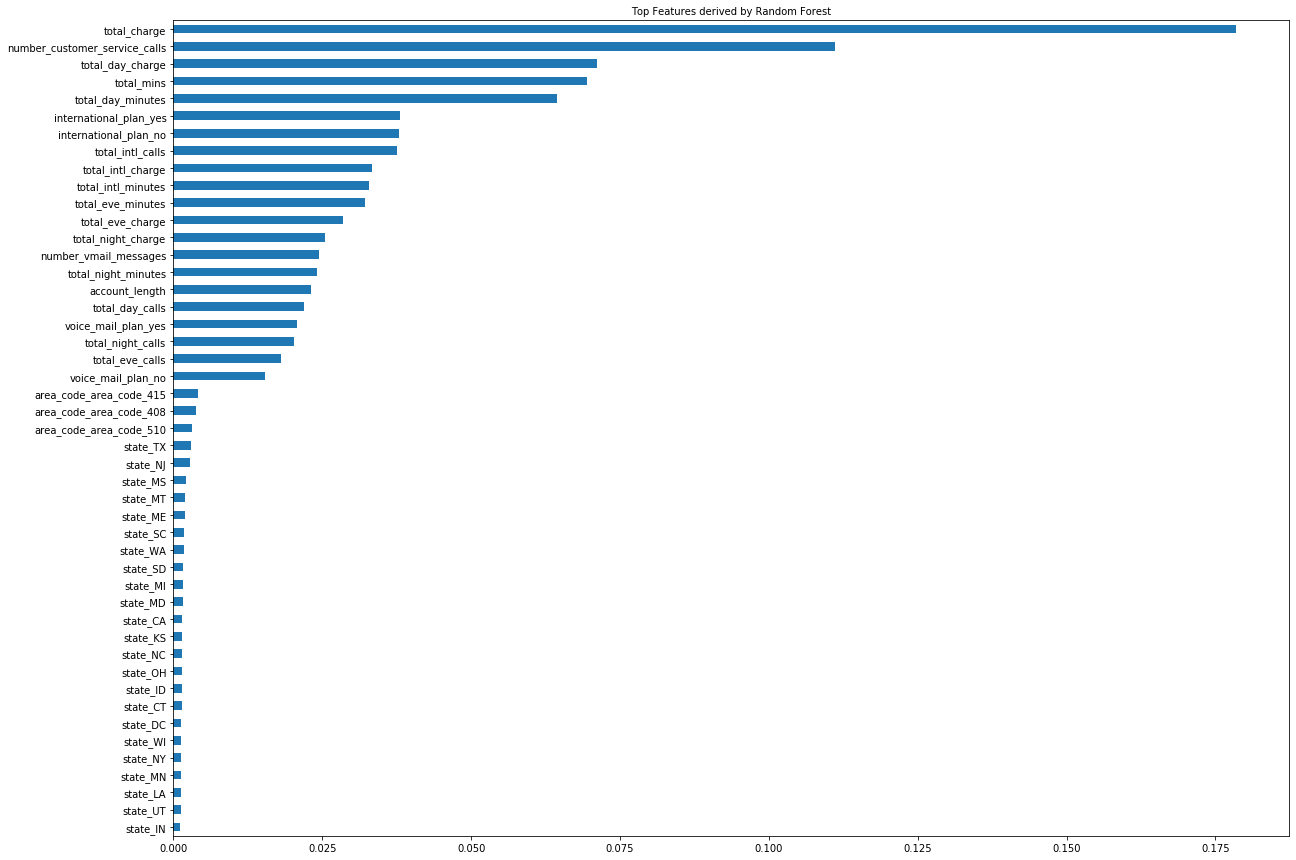

In [41]:
## To look for top features using Random Forest
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
model = rfc.fit(X_train_scaled, y_train)
(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(47)  
   .plot(kind='barh', figsize=[20,15])
   .invert_yaxis())
plt.yticks(size=10)
plt.title('Top Features derived by Random Forest', size=10)

Total charge and total mins are the most important features. However, both of them are multi-correlated so I will choose to keep the total charge and remove the total_mins feature. 

Meanwhile, keeping all the mins-related features instead of aggregating all of them into one single feature. 

Moreover, state and area code are the least important features. For the purpose of interpretability later, I will not keep them into the training phase. 

Finally, the features below are the features will be feed into ML models

In [42]:
official_features = ['international_plan',
                     'voice_mail_plan',
                     'number_vmail_messages',
                     'total_day_calls',
                     'total_eve_calls',
                     'total_night_calls',
                     'total_intl_calls',
                     'total_day_minutes',
                     'total_eve_minutes',
                     'total_night_minutes',
                     'total_intl_minutes',
                     'total_charge',
                     'number_customer_service_calls'
                    ]

In [43]:
train_predictors = train[official_features]
test_predictors = test[official_features]
#Dummy categorical variables
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
X_train, X_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)


In [44]:
#Standandize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)
y_train = train[target]
y_test= test[target]

In [45]:
#Check the shape of data
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(3333, 15)
(1667, 15)
(3333,)
(1667,)


### Feed preprocessed data into some ML Models

In [46]:
models = {'Logistic Regression': LogisticRegression(), 
          'SVM': SVC(probability=True),
         'Xgboost': XGBClassifier(),
         'Random Forest': RandomForestClassifier(),
         "Neural Network": MLPClassifier()}

In [47]:
proba_preds_list = []
preds_list = []

In [48]:
for clf_name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    preds_list.append(preds)
    proba_preds_list.append(clf.predict_proba(X_test_scaled))
    print(f'Stat result of model {clf_name}')
    print_stats(preds, target=y_test)
    print('\n \n')

Stat result of model Logistic Regression
Accuracy = 0.872
----------------------------------------
Classification report:
              precision    recall  f1-score   support

        Stay       0.89      0.98      0.93      1443
          Go       0.57      0.19      0.29       224

    accuracy                           0.87      1667
   macro avg       0.73      0.58      0.61      1667
weighted avg       0.84      0.87      0.84      1667

----------------------------------------
Confusion matrix
[[1411   32]
 [ 181   43]]

 

Stat result of model SVM
Accuracy = 0.932
----------------------------------------
Classification report:
              precision    recall  f1-score   support

        Stay       0.94      0.99      0.96      1443
          Go       0.88      0.57      0.69       224

    accuracy                           0.93      1667
   macro avg       0.91      0.78      0.83      1667
weighted avg       0.93      0.93      0.93      1667

-----------------------------

# Resampling

Because Xgboost returns in the best result with not churn of .99 and  churn of .92 in term of F1 metrics so I decided to go with Xgboost model in the next phase: tune model via resampling

In [49]:
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
    NearMiss(sampling_strategy="not minority"),
    TomekLinks(sampling_strategy='majority')
]

In [50]:
for sampler in samplers:
    X_train_resampling, y_train_resampling = sampler.fit_resample(X_train_scaled, y_train)
    clf = XGBClassifier()
    clf.fit(X_train_resampling, y_train_resampling)
    preds = clf.predict(X_test_scaled)
    print_stats(preds, target=y_test)
    print('\n \n')

Accuracy = 0.980
----------------------------------------
Classification report:
              precision    recall  f1-score   support

        Stay       0.98      1.00      0.99      1443
          Go       0.99      0.86      0.92       224

    accuracy                           0.98      1667
   macro avg       0.99      0.93      0.95      1667
weighted avg       0.98      0.98      0.98      1667

----------------------------------------
Confusion matrix
[[1442    1]
 [  32  192]]

 

Accuracy = 0.981
----------------------------------------
Classification report:
              precision    recall  f1-score   support

        Stay       0.98      1.00      0.99      1443
          Go       0.99      0.86      0.92       224

    accuracy                           0.98      1667
   macro avg       0.99      0.93      0.96      1667
weighted avg       0.98      0.98      0.98      1667

----------------------------------------
Confusion matrix
[[1442    1]
 [  31  193]]

 

Accura

# Task 3: Plot Lift Charts to compare models

In [51]:
proba_per_model = dict(zip(models.keys(), proba_preds_list))
abs_pred_per_model = dict(zip(models.keys(), preds_list))


The lift curve of Logistic Regression


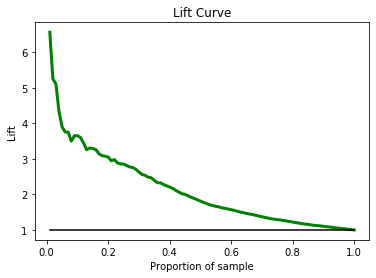

The lift curve of SVM


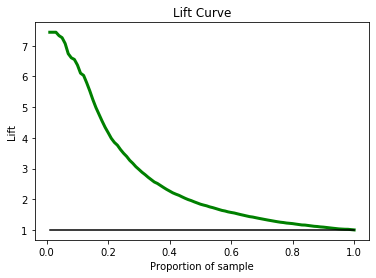

The lift curve of Xgboost


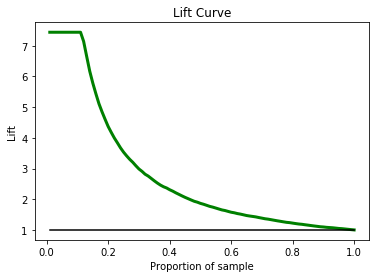

The lift curve of Random Forest


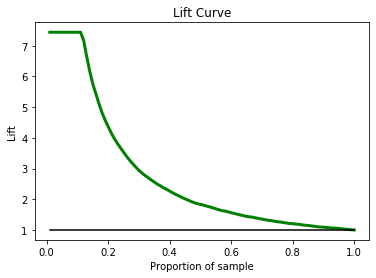

The lift curve of Neural Network


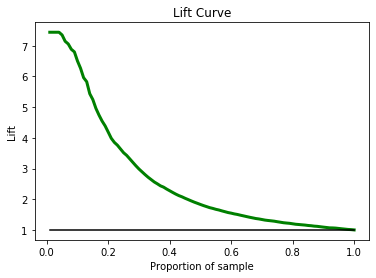

In [52]:
for model_name, proba_pre in proba_per_model.items():
    print(f'The lift curve of {model_name}')
    plot_Lift_curve(y_test, proba_per_model[model_name][:,1])

If you wanted to find 80% of the churning customers, 1565 customers would have to be identified over 1667 customers in the test set.

Use the result of Xgboost model to explain the answer above

In [53]:
df = pd.DataFrame()
#Create a real and predicted column for our new DataFrame and assign values
df['real'] = y_test
df['predicted'] = abs_pred_per_model['Xgboost']
#Order the values for the predicted probability column:
df = df.reset_index(drop = True)
df['cum_sum'] = df['predicted'].cumsum()
df['cum_perc'] = 100*df['cum_sum']/df['real'].sum()

In [54]:
df.loc[df['cum_perc']>80].head(1)

,real,predicted,cum_sum,cum_perc
1565,1,1,180,80.357143
